# Steve Groves: Capstone Project

## Notebook 3: What Is the Relationship between Housing Characteristics and Complaints?

### The question asked is: 
#### Does the Complaint Type that you identified in response to Question 1 have an obvious relationship with any particular characteristic or characteristic of the Houses?

<font color=blue>As well as using the Service Request data, the PLUTO data is also required to see if the features in that dataset relate to the complaint types</font>


### Step 1: Read both data sets in to Pandas Dataframes

In [1]:
# Read required libraries

import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#### Step 1.1: Read the Complaint Data 

In [2]:
# Get the start time of the data load process
load_start = datetime.now()
print("Data Load - start Time: ", load_start)

# Specify file directory properties
Path = "C:\\Users\STEPHENGroves\\Box Sync\\SteveG - Laptop Sync\\Work Stuff\\Training\\PyR\\Capstone Project\\Data\\"
Filename = "311_Service_Requests_from_2010_to_Present - HDP Only.csv"

Infile = open(Path + Filename)

# Read the csv file to a pandas dataframe and parse the two date fields so that they are typed as dates and not string
cap_df = pd.read_csv(Infile,parse_dates=['Created Date','Closed Date'])

# Get the finish time of the data load process
load_end = datetime.now()
print("Data Load - Finish Time: ", load_end)
print("Data load time is:", load_end - load_start)

# Close the referenced file and view the first two records of the dataframe
Infile.close()
cap_df.head(2)

Data Load - start Time:  2019-11-20 09:56:05.379661
Data Load - Finish Time:  2019-11-20 09:59:47.672762
Data load time is: 0:03:42.293101


,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,15716674,2010-01-12,2010-02-08,PLUMBING,RADIATOR,RESIDENTIAL BUILDING,11230.0,1001 AVENUE H,AVENUE H,ADDRESS,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.629459,-73.966928
1,15716675,2010-01-12,2010-01-15,HEATING,HEAT,RESIDENTIAL BUILDING,10456.0,1400 MORRIS AVENUE,MORRIS AVENUE,ADDRESS,BRONX,Closed,More than one complaint was received for this ...,Unspecified,40.838031,-73.911282


#### Step 1.2: Read the Pluto data which provides building information 

In [3]:
# Get the start time of the data load process
load_start = datetime.now()
print("Data Load - start Time: ", load_start)

# Specify file directory properties
Path = "C:\\Users\STEPHENGroves\\Box Sync\\SteveG - Laptop Sync\\Work Stuff\\Training\\PyR\\Capstone Project\\Data\\"
Filename = "pluto_19_reduced_fields.csv"

Infile = open(Path + Filename)

# Read the csv file to a pandas dataframe and parse the two date fields so that they are typed as dates and not string
pluto_df = pd.read_csv(Infile)

# Get the finish time of the data load process
load_end = datetime.now()
print("Data Load - Finish Time: ", load_end)
print("Data load time is:", load_end - load_start)

# Close the referenced file and view the first two records of the dataframe
Infile.close()
pluto_df.head(2)

Data Load - start Time:  2019-11-20 09:59:47.690968
Data Load - Finish Time:  2019-11-20 09:59:49.393411
Data load time is: 0:00:01.702443


,lot,zipcode,address,lotarea,bldgarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar,xcoord,ycoord
0,36,10019.0,801 11 AVENUE,26817.0,57805.0,0.0,0.0,12000.0,2.0,3.0,150.00,125.0,1920.0,2006.0,2.16,0.0,2.0,0.0,986332.0,219627.0
1,100,10019.0,PIER,172842.0,105562.0,0.0,0.0,0.0,1.0,0.0,266.75,0.0,2002.0,0.0,0.61,0.0,2.0,0.0,985279.0,219475.0


### Step 2: Check the Data Quality of both datasets; complaints and pluto

#### Step 2.1: Complaint Data - Building on from Question 1) and 2) we just need to keep the "Heat / Hot Water" complaints from the Bronx


In [4]:
# Firstly filter the data frame so that hhw_df contains just the heating/hotwater complaints
# The select just the HHW records which are based in the Bronx
# As the questions asks about zip codes, boroughs and streets, we will select a subset of columns, as not all are needed

hhw_df = cap_df.loc[cap_df['Complaint Type'].isin(['HEAT/HOT WATER']),['Unique Key','Created Date','Complaint Type','Incident Zip','Incident Address','Street Name','Borough']]   
hhw_bronx_df = hhw_df.loc[hhw_df['Borough'] == 'BRONX']
hhw_bronx_df.head(3)

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,Street Name,Borough
2594854,27611805,2014-03-11,HEAT/HOT WATER,10467.0,30 EAST 208 STREET,EAST 208 STREET,BRONX
2594855,27611806,2014-03-11,HEAT/HOT WATER,10458.0,2746 DECATUR AVENUE,DECATUR AVENUE,BRONX
2594857,27611809,2014-03-11,HEAT/HOT WATER,10472.0,1025 BOYNTON AVENUE,BOYNTON AVENUE,BRONX


<font color=blue>
From the Complaint data we have just kept the Incident Info (Key, Create Date and Complaint Type) along with the location information (Zip, Address, Street and Borough)<br><br>
The 'Street Name' information is just a subset of 'Incident Address' and therefore we may not need both of these fields    
    
</font>



#### Step 2.2: Complaint Data - Check and remove records with missing location data which cannot be matched to Pluto data

In [5]:
#Identify missing values in Complaint Data
missing_hhw_bronx = hhw_bronx_df.isnull()
missing_hhw_bronx.head(3)

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,Street Name,Borough
2594854,False,False,False,False,False,False,False
2594855,False,False,False,False,False,False,False
2594857,False,False,False,False,False,False,False


In [6]:
# Summarise missing values in Complaint Data
non_keyfields = ['Unique Key','Created Date','Complaint Type']
keyfields = ['Incident Zip', 'Incident Address','Street Name', 'Borough']

print('-------------------------------------------------------------')
print('-- Missing Value Analysis: Identifying Fields and Metadata --')
print('-------------------------------------------------------------')
for field in non_keyfields:
    print(field)
    print (missing_hhw_bronx[field].value_counts())
    print("") 

print('-------------------------------------------------')
print('-- Missing Value Analysis: Key Analysis Fields --')
print('-------------------------------------------------')
for field in keyfields:
    print(field)
    print (missing_hhw_bronx[field].value_counts())
    print("") 

-------------------------------------------------------------
-- Missing Value Analysis: Identifying Fields and Metadata --
-------------------------------------------------------------
Unique Key
False    383259
Name: Unique Key, dtype: int64

Created Date
False    383259
Name: Created Date, dtype: int64

Complaint Type
False    383259
Name: Complaint Type, dtype: int64

-------------------------------------------------
-- Missing Value Analysis: Key Analysis Fields --
-------------------------------------------------
Incident Zip
False    381402
True       1857
Name: Incident Zip, dtype: int64

Incident Address
False    383259
Name: Incident Address, dtype: int64

Street Name
False    383259
Name: Street Name, dtype: int64

Borough
False    383259
Name: Borough, dtype: int64



<font color=blue>
The Missing Value Analysis on Identifying Fields shows: <br>
 - Every complaint has a Unique ID, Creation Date and Complaint Type<br><br>
The Missing Value Analysis on Key Analysis Fields shows:<br>
 - Complete data is available for all fields except Incident Zip, which as 1857 missing values<br>
    - As <b>Incident Zip</b> is a key field in the join with the pluto data, we will <b>remove</b> any complaints without a zip code
    </font>

In [7]:
# drop rows with missing values
hhw_bronx_clean_df = hhw_bronx_df.dropna()
print('Shape of pre-cleaned Bronx heating/hotwater complaints is:',hhw_bronx_df.shape)
print('Shape of CLEANED Bronx heating/hotwater complaints is:    ',hhw_bronx_clean_df.shape)

Shape of pre-cleaned Bronx heating/hotwater complaints is: (383259, 7)
Shape of CLEANED Bronx heating/hotwater complaints is:     (381402, 7)


#### Step 2.3: Pluto Data - Check and remove records with missing location data which cannot be matched to Complaint data

In [8]:
#Identify missing values in Pluto Data
missing_pluto_df = pluto_df.isnull()
missing_pluto_df.head(3)

,lot,zipcode,address,lotarea,bldgarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar,xcoord,ycoord
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# Summarise missing values in Pluto Data
non_keyfields = ['lot','lotarea','bldgarea','resarea','officearea','retailarea','numbldgs','numfloors','lotdepth','bldgdepth','yearbuilt','yearalter1','builtfar','residfar','commfar','facilfar','xcoord','ycoord']
keyfields = ['zipcode','address']

print('--------------------------------------------------------------')
print('-- Missing Value Analysis: Explanatory Features in Analysis --')
print('--------------------------------------------------------------')
for field in non_keyfields:
    print(field)
    print (missing_pluto_df[field].value_counts())
    print("") 

print('-------------------------------------------------')
print('-- Missing Value Analysis: Key Matching Fields --')
print('-------------------------------------------------')
for field in keyfields:
    print(field)
    print (missing_pluto_df[field].value_counts())
    print("") 

--------------------------------------------------------------
-- Missing Value Analysis: Explanatory Features in Analysis --
--------------------------------------------------------------
lot
False    859459
Name: lot, dtype: int64

lotarea
False    857908
True       1551
Name: lotarea, dtype: int64

bldgarea
False    858968
True        491
Name: bldgarea, dtype: int64

resarea
False    810638
True      48821
Name: resarea, dtype: int64

officearea
False    810638
True      48821
Name: officearea, dtype: int64

retailarea
False    810638
True      48821
Name: retailarea, dtype: int64

numbldgs
False    857908
True       1551
Name: numbldgs, dtype: int64

numfloors
False    857908
True       1551
Name: numfloors, dtype: int64

lotdepth
False    857908
True       1551
Name: lotdepth, dtype: int64

bldgdepth
False    857908
True       1551
Name: bldgdepth, dtype: int64

yearbuilt
False    858986
True        473
Name: yearbuilt, dtype: int64

yearalter1
False    858986
True        473
Nam

<font color=blue>
The Missing Value Analysis on <b>Key Matching Fields</b> shows: <br>
    - There are missing values on both address and zipcode, which means these records <b>cannot</b> be joined to the 'Complaint' data<br><br>
The Missing Value Analysis on <b>Explanatory Feature</b> fields shows:<br>
 - All columns have some level of missing values, <br><br>

Records with missing values will be deleted as they cannot be matched
    </font>

In [10]:
# drop rows with missing values
pluto_clean_df = pluto_df.dropna()
print('Shape of pre-cleaned Pluto building information is:',pluto_df.shape)
print('Shape of CLEANED Pluto building information is:    ',pluto_clean_df.shape)

Shape of pre-cleaned Pluto building information is: (859459, 20)
Shape of CLEANED Pluto building information is:     (808254, 20)


### Step 3: Join the Complaint & Pluto data sets together


#### Step 3.1: Rename the matching fields in Pluto data to be the same as the field names in the Complaint Data  

In [11]:
pluto_final_df = pluto_clean_df.rename(columns={'zipcode':'Incident Zip','address':'Incident Address' })
pluto_final_df.head(2)

,lot,Incident Zip,Incident Address,lotarea,bldgarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar,xcoord,ycoord
0,36,10019.0,801 11 AVENUE,26817.0,57805.0,0.0,0.0,12000.0,2.0,3.0,150.00,125.0,1920.0,2006.0,2.16,0.0,2.0,0.0,986332.0,219627.0
1,100,10019.0,PIER,172842.0,105562.0,0.0,0.0,0.0,1.0,0.0,266.75,0.0,2002.0,0.0,0.61,0.0,2.0,0.0,985279.0,219475.0


#### Step 3.2: Check the data types of the key fields in both data files so that the join is possible

In [12]:
array = ['Incident Zip','Incident Address']

print('-- Complaints Data Schema --')
print(hhw_bronx_clean_df[array].dtypes)

print('')
print('---- Pluto Data Schema ----')
print(pluto_final_df[array].dtypes)

-- Complaints Data Schema --
Incident Zip        float64
Incident Address     object
dtype: object

---- Pluto Data Schema ----
Incident Zip        float64
Incident Address     object
dtype: object


<font color=blue>
Both dataframes have two key fields, named the same, which are of the same data type, therefore the join should be now possible!
</font>

#### Step 3.3: Join the Complaint dataframe with the Pluto dataframe 

In [13]:
# specify the two dataframes and which fields in each are the key fields
merged_data = pd.merge(left=hhw_bronx_clean_df, right=pluto_final_df, left_on=['Incident Zip','Incident Address'], right_on = ['Incident Zip','Incident Address'], how='inner')
merged_data.head(2)

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,Street Name,Borough,lot,lotarea,bldgarea,...,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar,xcoord,ycoord
0,27611805,2014-03-11,HEAT/HOT WATER,10467.0,30 EAST 208 STREET,EAST 208 STREET,BRONX,134,10000.0,50000.0,...,100.0,84.0,1935.0,1991.0,5.0,3.44,0.0,4.8,1016648.0,259900.0
1,27741270,2014-03-28,HEAT/HOT WATER,10467.0,30 EAST 208 STREET,EAST 208 STREET,BRONX,134,10000.0,50000.0,...,100.0,84.0,1935.0,1991.0,5.0,3.44,0.0,4.8,1016648.0,259900.0


In [14]:
# Show the schema for the joined file
merged_data.dtypes

Unique Key                   int64
Created Date        datetime64[ns]
Complaint Type              object
Incident Zip               float64
Incident Address            object
Street Name                 object
Borough                     object
lot                          int64
lotarea                    float64
bldgarea                   float64
resarea                    float64
officearea                 float64
retailarea                 float64
numbldgs                   float64
numfloors                  float64
lotdepth                   float64
bldgdepth                  float64
yearbuilt                  float64
yearalter1                 float64
builtfar                   float64
residfar                   float64
commfar                    float64
facilfar                   float64
xcoord                     float64
ycoord                     float64
dtype: object

### Step 4: Understand existing fields and derive any other fields which may be useful in the analysis

 - Unique Key: Unique reference ID for Complaint
 - Created Date: Complaint creation date
 - Incident Zip: Zip code of address of the complaint
 - Incident Address: Address of the complaint
 - Street Name: Street of which the complaint is lodged
 - Borough: Borough of the complaint location
 - Lot: The number of the tax lot
 - Lotarea: Total area of the tax lot, expressed in square feet rounded to the nearest integer
 - BldgArea: The total gross area in square feet
 - ResArea: An estimate of the exterior dimensions of the portion of the structure(s) allocated for residential use
 - OfficeArea: An estimate of the exterior dimensions of the portion of the structure(s) allocated for office use
 - RetailArea: An estimate of the exterior dimensions of the portion of the structure(s) allocated for retail use
 - NumBldgs: The number of buildings on the tax lot
 - NumFloors: In the tallest building on the tax lot, the number of full and partial stories starting from the ground 
 - LotDepth: The tax lot's depth measured in feet
 - BldgDepth: The building’s depth, which is the effective perpendicular distance, measured in feet
 - YearBuilt: The year construction of the building was completed
 - YearAlter1: Year of most recent alteration  
 - BuiltFAR: The Built Floor Area Ratio (FAR) is the total building floor area divided by the area of the tax lot
 - ResidFAR: The Maximum Allowable Residential Floor Area Ratio (FAR)
 - CommFAR: The Maximum Allowable Commercial Floor Area Ratio (FAR)
 - FacilFAR: The Maximum Allowable Community Facility Floor Area Ratio (FAR)
 - YCoord: The Y coordinate of the XY coordinate pair which depicts the approximate location of the lot
 - XCoord: The X coordinate of the XY coordinate pair which depicts the approximate location of the lot

#### A useful field to have may be "Building Age", assuming current year is 2019 and drop rows where YearBuilt has empty (NAN) value

#### Step 4.1: Calculate Building Age and Time Since Last Alteration 

In [15]:
# Add a new column 'Age' (in years) and time since last alteration
merged_data['Build Age'] =  (2019 - merged_data['yearbuilt'] )
merged_data['Alter Age'] =  (2019 - merged_data['yearalter1'] )

merged_data.head(2)

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,Street Name,Borough,lot,lotarea,bldgarea,...,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar,xcoord,ycoord,Build Age,Alter Age
0,27611805,2014-03-11,HEAT/HOT WATER,10467.0,30 EAST 208 STREET,EAST 208 STREET,BRONX,134,10000.0,50000.0,...,1935.0,1991.0,5.0,3.44,0.0,4.8,1016648.0,259900.0,84.0,28.0
1,27741270,2014-03-28,HEAT/HOT WATER,10467.0,30 EAST 208 STREET,EAST 208 STREET,BRONX,134,10000.0,50000.0,...,1935.0,1991.0,5.0,3.44,0.0,4.8,1016648.0,259900.0,84.0,28.0


In [16]:
g1 = ['lot','lotarea','bldgarea','resarea','officearea','retailarea','numbldgs','numfloors','lotdepth','bldgdepth','builtfar','residfar','commfar','facilfar']
merged_data[g1].describe()

,lot,lotarea,bldgarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,builtfar,residfar,commfar,facilfar
count,285837.000000,2.858370e+05,2.858370e+05,2.858370e+05,2.858370e+05,285837.000000,285837.000000,285837.000000,285837.000000,285837.000000,285837.000000,285837.000000,285837.000000,285837.000000
mean,107.999857,1.521308e+04,5.505007e+04,5.319287e+04,2.979863e+02,739.999094,1.097146,5.507103,116.991790,91.347940,3.780509,3.379958,0.086604,4.660044
std,646.750159,3.702004e+04,6.568153e+04,6.250852e+04,5.611511e+03,2436.916392,0.534788,2.421333,52.161704,36.352323,2.811403,1.571652,0.519368,1.399536
min,1.000000,6.590000e+02,2.000000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,5.000000e+03,1.980000e+04,1.920000e+04,0.000000e+00,0.000000,1.000000,5.000000,100.000000,76.000000,3.160000,2.430000,0.000000,4.800000
50%,33.000000,1.028500e+04,4.426200e+04,4.327000e+04,0.000000e+00,0.000000,1.000000,5.000000,100.000000,87.000000,3.980000,3.440000,0.000000,4.800000
75%,58.000000,1.638000e+04,6.780000e+04,6.630000e+04,0.000000e+00,0.000000,1.000000,6.000000,121.580000,98.000000,4.530000,3.440000,0.000000,4.800000
max,7503.000000,3.392065e+06,2.812639e+06,2.812639e+06,1.132500e+06,249720.000000,39.000000,30.000000,972.330000,750.000000,259.800000,10.000000,9.000000,10.000000


### Step 5: Explore Relationships between Complaints and Other Fields 

#### Step 5.1 - Create complaint summaries by various explanatory variables

In [17]:
# Create dataframes showing counts/volumes of complaints in relation to the explanatory field
# Integer fields have a simple group by to count complaints per integer value
age_df = merged_data.loc[merged_data['Build Age'] < 200].groupby('Build Age')['Complaint Type'].count().reset_index(name='Complaints')
alteration_df = merged_data.loc[merged_data['Alter Age'] < 85].groupby('Alter Age')['Complaint Type'].count().reset_index(name='Complaints')
floors_df = merged_data.groupby('numfloors')['Complaint Type'].count().reset_index(name='Complaints')
numbldg_df = merged_data.groupby('numbldgs')['Complaint Type'].count().reset_index(name='Complaints')

# Float fields are binned in to 15 bins and then complaints are counted per bin
resarea_df =merged_data.loc[merged_data['resarea'] < 300000]
resarea_grp_df = resarea_df.groupby(pd.cut(resarea_df.resarea, 15))['resarea'].count()
bldgarea_df =merged_data.loc[merged_data['bldgarea'] < 200000]
bldgarea_grp_df = bldgarea_df.groupby(pd.cut(bldgarea_df.bldgarea, 15))['bldgarea'].count()

#bldgarea_grp_df

#### Step 5.2 - Plot the Integer Fields against Complaints using Scatter Plots

Text(0, 0.5, 'Number of Complaints')

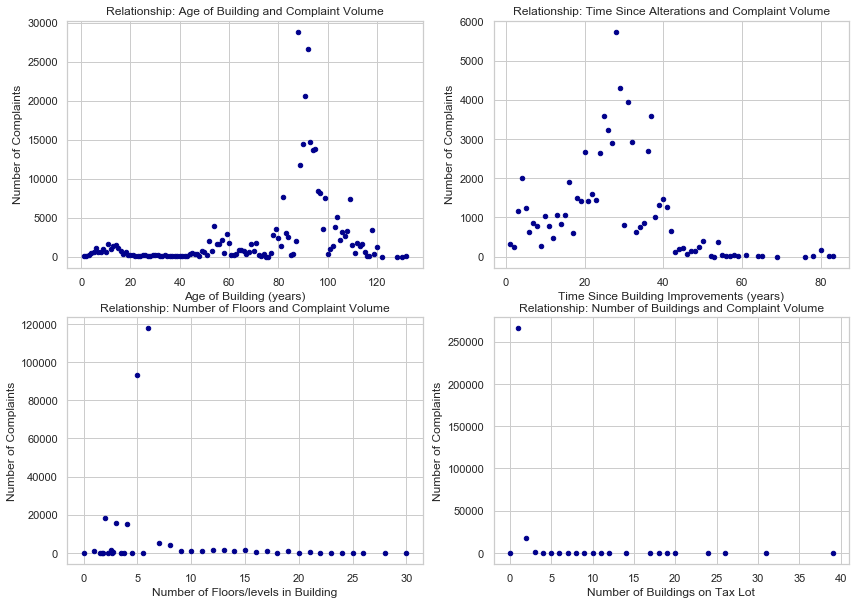

In [18]:
fig = plt.figure() # create figure

ax1 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax2 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax3 = fig.add_subplot(2, 2, 3) # add subplot 3 (2 row, 2 columns, third plot)
ax4 = fig.add_subplot(2, 2, 4) # add subplot 4 (2 row, 2 columns, fourth plot)

# Subplot 1: Scatter - Building age with Complaints
age_df.plot(kind='scatter', x='Build Age', y='Complaints', figsize=(14, 10), color='darkblue',ax=ax1)   #subplot 1
ax1.set_title('Relationship: Age of Building and Complaint Volume')
ax1.set_xlabel('Age of Building (years)')
ax1.set_ylabel('Number of Complaints')

# Subplot 2: Scatter - Alteration Time with Complaints
alteration_df.plot(kind='scatter', x='Alter Age', y='Complaints', figsize=(14, 10), color='darkblue',ax=ax2)   #subplot 2
ax2.set_title('Relationship: Time Since Alterations and Complaint Volume')
ax2.set_xlabel('Time Since Building Improvements (years)')
ax2.set_ylabel('Number of Complaints')

# Subplot 3: Scatter - Number of Floors with Complaints
floors_df.plot(kind='scatter', x='numfloors', y='Complaints', figsize=(14, 10), color='darkblue',ax=ax3)   #subplot 3
ax3.set_title('Relationship: Number of Floors and Complaint Volume')
ax3.set_xlabel('Number of Floors/levels in Building')
ax3.set_ylabel('Number of Complaints')

# Subplot 4: Scatter - Number of Buildings with Complaints
numbldg_df.plot(kind='scatter', x='numbldgs', y='Complaints', figsize=(14, 10), color='darkblue',ax=ax4)   #subplot 4
ax4.set_title('Relationship: Number of Buildings and Complaint Volume')
ax4.set_xlabel('Number of Buildings on Tax Lot')
ax4.set_ylabel('Number of Complaints')

#### Step 5.3 - Plot the Floating Values (after Binning) against Complaints using Bar Charts

Text(0, 0.5, 'Number of Complaints')

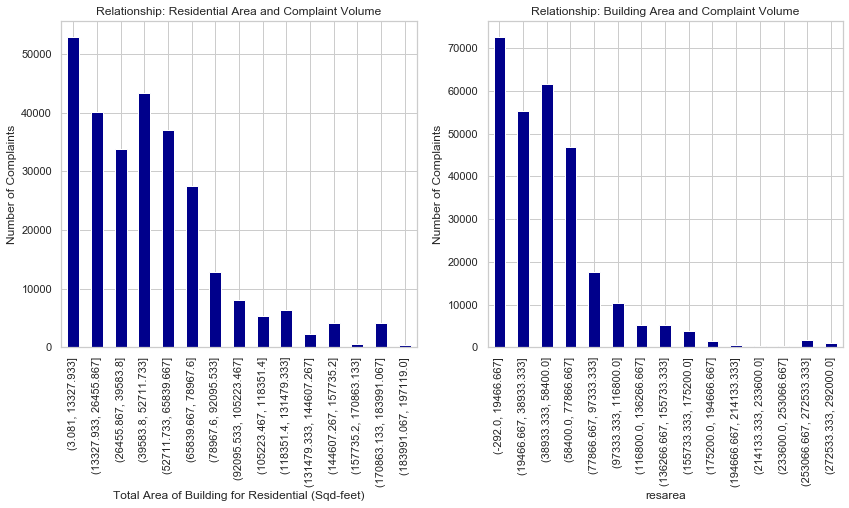

In [19]:
fig = plt.figure() # create figure

ax1 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: Bar Chart  - Binned Building Area with Complaints
bldgarea_grp_df.plot(kind='bar',y='bldgarea', figsize=(14, 6), color='darkblue',ax=ax1)
ax2.set_title('Relationship: Building Area and Complaint Volume')
ax2.set_xlabel('Total Area of Building (Sqd-feet)')
ax2.set_ylabel('Number of Complaints')

# Subplot2: Bar Chart - Residential Area with Complaints
resarea_grp_df.plot(kind='bar',y='resarea', figsize=(14, 6), color='darkblue',ax=ax2)
ax1.set_title('Relationship: Residential Area and Complaint Volume')
ax1.set_xlabel('Total Area of Building for Residential (Sqd-feet)')
ax1.set_ylabel('Number of Complaints')

## Conclusion:

<font color=blue>
<b><u>Data Preparation:</u></b><br>
 - Both data sets (Complaints and Pluto) were imported and only the Heat/HotWater complaints for the Bronx were kept for analysis.<br>
 - Both files were checked for missing values. Records with missing values in fields required for the join were removed from the dataset.<br>
 - The Pluto data (containing building information) was successfully joined to the Complaint Data.<br> 
 - A dataset providing  potentially explanatory information at a building level was therefore created.<br><br>
<b><u>Exploratory Analysis:</u></b><br>
 - Individual dataframes were created for each piece of exploratory analysis (visualised relationships).<br>
 - Due to time constraints, only 6 fields were explored in regard to their relationship with complaints:<br>
&emsp; * There is variability in Heating/Hot Water complaints around the 5-15 year old buildings but much more in the 60-100 year old buildings.<br>
&emsp; * There is lots of variability in Heating/Hot Water complaints for buildings which have been renovated in the last 40 years.<br>
&emsp; * There does not seem to be a strong relationship between the number of floors in a building and the Heating/Hot Water complaints.<br>
&emsp; * There does not seem to be a strong relationship between the number buildings in the Tax Lot and the Heating/Hot Water complaints.<br>
&emsp; * There does seem to be a weak relationship between the total area of the building and the Heating/Hot Water complaints.<br>
&emsp; * There does  seem to be a weak relationship between the residential building size and the Heating/Hot Water complaints.
</font>